In [1]:
import pandas
import pickle 
import torch 

In [7]:
pretrained_ckpt = '../ckpts/Seed_1__Tr_Pedestrian__Val_Pedestrian__ValRatio_0.1__filter_agent_type__train.pt'
lora_ckpt = '../ckpts/Seed_1__Tr_Biker__Val_Biker__ValRatio_0.1__filter_agent_type_deathCircle_0__lora_1__Pos_0_1_2_3_4__TrN_20__lr_0.0005.pt'
lora_1 = torch.load(lora_ckpt)
pretrained = torch.load(pretrained_ckpt)

In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline 

In [1]:
list_lora_layer = ['encoder.stages.0.0', 'encoder.stages.1.1', 'encoder.stages.1.3', 'encoder.stages.2.1', 'encoder.stages.2.3', 'encoder.stages.3.1', 'encoder.stages.3.3', 'encoder.stages.4.1', 'encoder.stages.4.3']

In [44]:
for i, layer in enumerate(list_lora_layer):
    add = (lora_1[layer+'.lora_B'] @ lora_1[layer+'.lora_A']).cpu().detach().numpy()
    print('layer:', layer, ', # total:', add.reshape(-1).shape[0], ', # non-zero:', (add != 0.0).sum(),
        ', % non-zero:', round((add != 0.0).sum() / add.reshape(-1).shape[0], 2))

layer: encoder.stages.0.0 , # total: 4032 , # non-zero: 4032 , % non-zero: 1.0
layer: encoder.stages.1.1 , # total: 9216 , # non-zero: 8352 , % non-zero: 0.91
layer: encoder.stages.1.3 , # total: 9216 , # non-zero: 8640 , % non-zero: 0.94
layer: encoder.stages.2.1 , # total: 18432 , # non-zero: 17568 , % non-zero: 0.95
layer: encoder.stages.2.3 , # total: 36864 , # non-zero: 32256 , % non-zero: 0.88
layer: encoder.stages.3.1 , # total: 36864 , # non-zero: 33984 , % non-zero: 0.92
layer: encoder.stages.3.3 , # total: 36864 , # non-zero: 35712 , % non-zero: 0.97
layer: encoder.stages.4.1 , # total: 36864 , # non-zero: 33408 , % non-zero: 0.91
layer: encoder.stages.4.3 , # total: 36864 , # non-zero: 29376 , % non-zero: 0.8


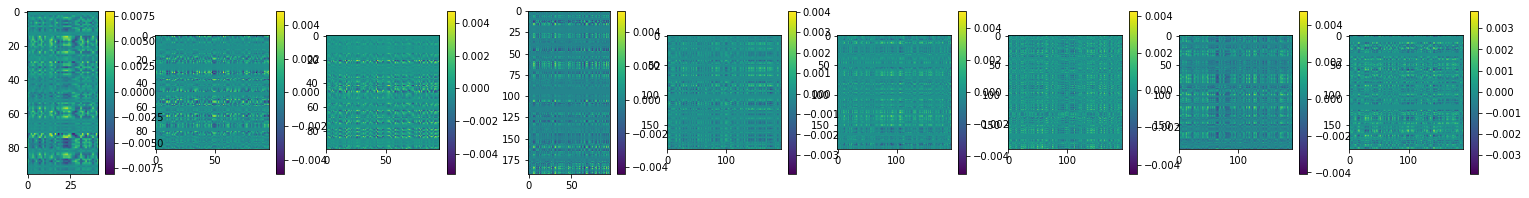

In [8]:
fig, axes = plt.subplots(1, 9, figsize=(27, 3))
for i, layer in enumerate(list_lora_layer):
    add = (lora_1[layer+'.lora_B'] @ lora_1[layer+'.lora_A']).cpu().detach().numpy()
    im = axes[i].imshow(add)
    plt.colorbar(im, ax=axes[i])

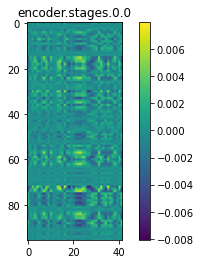

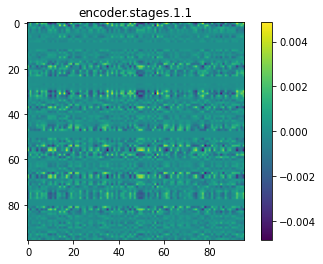

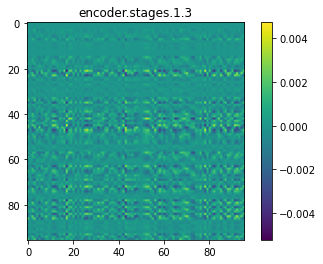

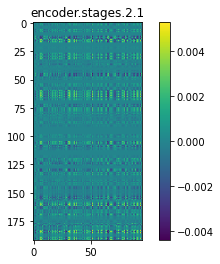

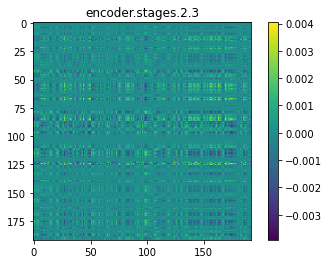

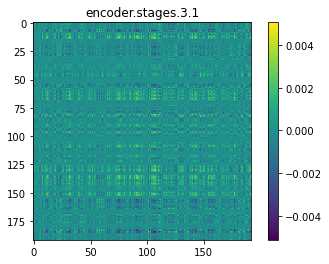

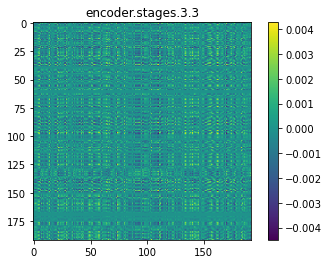

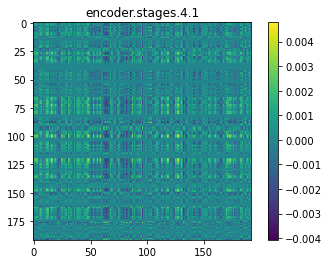

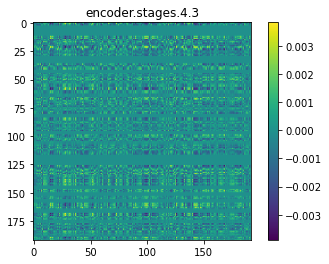

In [11]:
for i, layer in enumerate(list_lora_layer):
    add = (lora_1[layer+'.lora_B'] @ lora_1[layer+'.lora_A']).cpu().detach().numpy()
    plt.figure()
    plt.imshow(add)
    plt.title(layer)
    plt.colorbar()

In [3]:
lora_ckpt = '../ckpts/DC0__lora/Seed_1__Tr_Biker__Val_Biker__ValRatio_0.1__filter_agent_type_deathCircle_0__lora_1__TrN_20__lr_0.005__bias.pt'
lora_1 = torch.load(lora_ckpt, map_location=torch.device('cpu'))

In [4]:
lora_1

OrderedDict([('encoder.stages.0.0.bias',
              Parameter containing:
              tensor([ 0.0272, -0.0580,  0.0054, -0.0174, -0.0070,  0.0595,  0.0527,  0.0659,
                      -0.0470, -0.0736,  0.0396,  0.0657,  0.0037, -0.0400,  0.1306, -0.0129,
                      -0.1020,  0.0174, -0.0563, -0.0033,  0.1110, -0.0528,  0.0733, -0.0079,
                       0.0305,  0.0232, -0.0874,  0.0661,  0.0135, -0.0298,  0.0766,  0.0419],
                     requires_grad=True)),
             ('encoder.stages.1.1.bias',
              Parameter containing:
              tensor([-0.0047,  0.0316,  0.0496, -0.0508,  0.0015,  0.0267, -0.0632,  0.0515,
                      -0.0103,  0.0046,  0.0982, -0.0282, -0.1526,  0.0038,  0.0009,  0.0104,
                       0.0013, -0.0451, -0.0364, -0.0053, -0.0394,  0.0606, -0.1147,  0.0273,
                      -0.0009, -0.0385,  0.0061, -0.0847,  0.0597,  0.0530, -0.0475,  0.0406],
                     requires_grad=True)),
      